# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [6]:
def apply_svd_custom(X_train, X_test, n_components):

    print(f"Performing SVD on training data with {n_components} components...")
    U, Sigma, VT = np.linalg.svd(X_train, full_matrices=False)
    Sigma_truncated = np.diag(Sigma[:n_components])
    U_truncated = U[:, :n_components]
    VT_truncated = VT[:n_components, :]
    X_train_reduced = np.dot(U_truncated, Sigma_truncated)  
    X_test_reduced = np.dot(X_test, VT_truncated.T)
    
    return X_train_reduced, X_test_reduced



## Part 3: Train Logistic Regression and Measure Performance

In [7]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42)
    
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time



## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [8]:
# Define the range of SVD components to experiment with
svd_components = [50, 100, 200, 500]  # Choose a range of components

# Store the results in a list
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    # Store the results
    results.append({
        "n_components": n_components,
        "accuracy": accuracy,
        "training_time": training_time
    })
    
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")



Training models with different levels of SVD preprocessing...
Applying custom SVD with 50 components...
Performing SVD on training data with 50 components...
SVD components: 50, Accuracy: 0.9085, Training time: 6.3194 seconds
Applying custom SVD with 100 components...
Performing SVD on training data with 100 components...
SVD components: 100, Accuracy: 0.9181, Training time: 23.8855 seconds
Applying custom SVD with 200 components...
Performing SVD on training data with 200 components...
SVD components: 200, Accuracy: 0.9206, Training time: 63.4747 seconds
Applying custom SVD with 500 components...
Performing SVD on training data with 500 components...
SVD components: 500, Accuracy: 0.9205, Training time: 225.3766 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


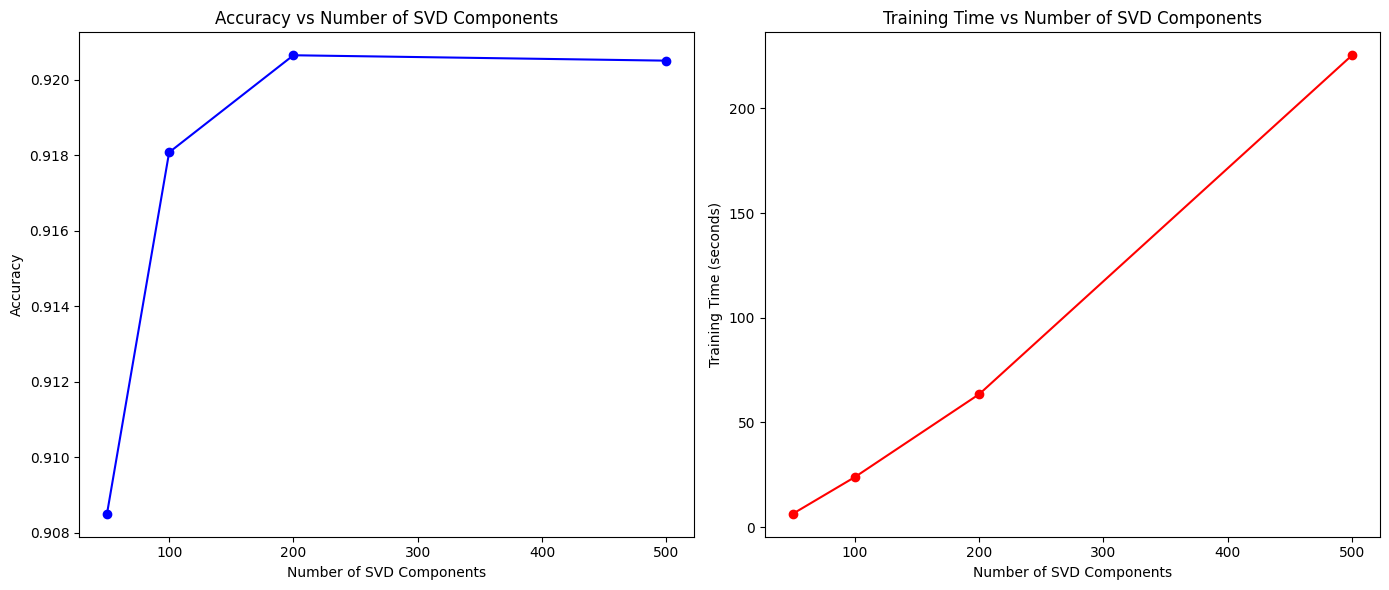

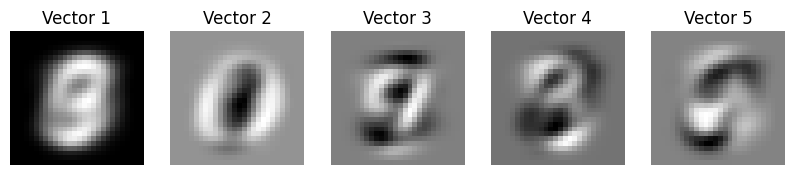

In [12]:
import matplotlib.pyplot as plt
import numpy as np

n_components = [result['n_components'] for result in results]
accuracies = [result['accuracy'] for result in results]
training_times = [result['training_time'] for result in results]
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(n_components, accuracies, marker='o', color='b')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of SVD Components')

plt.subplot(1, 2, 2)
plt.plot(n_components, training_times, marker='o', color='r')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs Number of SVD Components')

plt.tight_layout()
plt.show()

def visualize_top_singular_vectors(VT, n_vectors=5):
    plt.figure(figsize=(10, 2))
    
    for i in range(n_vectors):
        singular_vector = VT[i, :].reshape(28, 28)  
        plt.subplot(1, n_vectors, i + 1)
        plt.imshow(singular_vector, cmap='gray')
        plt.axis('off')
        plt.title(f"Vector {i + 1}")
    
    plt.show()

U, Sigma, VT = np.linalg.svd(X_train, full_matrices=False)

visualize_top_singular_vectors(VT, n_vectors=5)


## Part 6: Analyze / Conclusion 

YOUR ANSWER: 
As the number of SVD components increases, the accuracy of the logistic regression model will improve. This is expected, as the more components there are, the more original variance and important features will be retained in the data. However, after a certain point (e.g. 200 or 500 components), the improvement in accuracy begins to weaken, indicating that additional components did not significantly improve model performance.

The training time will significantly increase with the increase of components. For example, the training time jumps from around 6.3 seconds for 50 components to over 23.88 seconds for 100 components, and continues to increase as the number of components increases. This highlights the computational cost of using higher dimensional data.

According to experiments, a good trade-off seems to be around 100 to 200 components. Within this range, the accuracy is relatively high (over 91%), and compared to a large number of components, the training time is still controllable. Using fewer components (such as 50) can speed up training, but accuracy will significantly decrease. After exceeding 200 components, the improvement in accuracy will decrease, while the cost of training time continues to increase, indicating that adding more components does not justify additional computational costs.

In conclution, Experiments have shown that SVD can effectively reduce the dimensionality of MNIST datasets, making it easier and faster to train machine learning models such as logistic regression. The optimal choice of approximately 100 to 200 components can balance accuracy and computational cost.